In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import sklearn
print(sklearn.__version__)


from collections import Counter

from sklearn.metrics import accuracy_score

1.4.1.post1


In [2]:
!pip install -U scikit-learn

In [3]:
# import iris dataset
from sklearn import datasets

iris = datasets.load_iris()

print(type(iris))

# use the numpy concatenate function
iris_df = pd.DataFrame(data=np.column_stack((iris.data, iris.target)), columns=iris.feature_names + ['target'])


<class 'sklearn.utils._bunch.Bunch'>


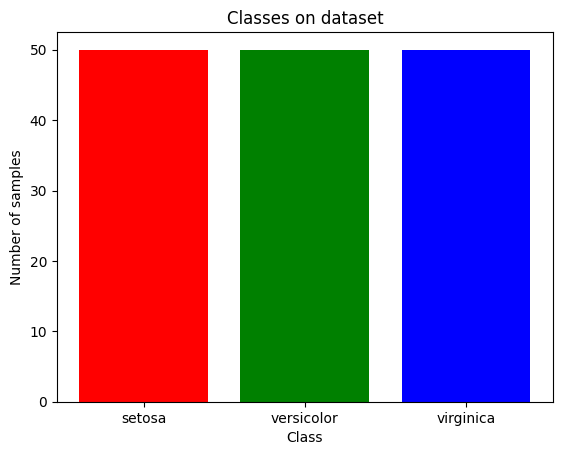

In [4]:
#check the samples for each class / is it balanced dataset
unique, counts = np.unique(iris.target, return_counts=True)


plt.bar(iris.target_names, counts, color=['red', 'green', 'blue'])
plt.title('Classes on dataset')
plt.xlabel('Class')
plt.ylabel('Number of samples')
plt.show()

In [5]:
#check for missing data
missing_values = iris_df.isnull().sum()
missing_values

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [6]:
#check duplicates
duplicate_count = iris_df.duplicated().sum()
duplicate_count

1

In [7]:
#drop duplicates
iris_df = iris_df.drop_duplicates()
#test after remove the duplicates
remaining_duplicates = iris_df.duplicated().sum()
remaining_duplicates

0

In [8]:
##select all rows and all columns except the last one.
X = iris_df.iloc[:, :-1]

##select all rows, but only the last column.
y = iris_df.iloc[:, -1]

In [26]:
#split the data into train and test sets (80,20):
#Shuffle=True, meaning the data will be shuffled before splitting.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True )

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

X_test = np.asarray(X_test)
y_test = np.asarray(y_test)


In [10]:
#check the traing set size and test set size:

print(X_train.shape)

print(y_test.shape)

(119, 4)
(30,)


In [11]:
import numpy as np

# Calculate minimum and maximum values for each feature in the training set
X_train_min = X_train.min(axis=0)
X_train_max = X_train.max(axis=0)

# Calculate minimum and maximum values for each feature in the test set
X_test_min = X_test.min(axis=0)
X_test_max = X_test.max(axis=0)

# Initialize lists to store normalized values
X_train_normalized = []
X_test_normalized = []

# Normalize the training set
for i in range(len(X_train)):
    x = (X_train[i] - X_train_min) / (X_train_max - X_train_min)
    X_train_normalized.append(x)

# Normalize the test set using the same normalization parameters as the training set
for i in range(len(X_test)):
    x = (X_test[i] - X_test_min) / (X_test_max - X_test_min)
    X_test_normalized.append(x)

# Convert the lists to NumPy arrays
X_train_normalized = np.asarray(X_train_normalized)
X_test_normalized = np.asarray(X_test_normalized)

# Print the normalized training and test sets
print("Normalized training set:")
print(X_train_normalized)
print("\nNormalized test set:")
print(X_test_normalized)

Normalized training set:
[[0.17647059 0.41666667 0.06779661 0.04166667]
 [1.         0.25       1.         0.91666667]
 [0.26470588 0.875      0.08474576 0.        ]
 [0.58823529 0.58333333 0.77966102 0.95833333]
 [0.58823529 0.29166667 0.66101695 0.70833333]
 [0.35294118 0.125      0.50847458 0.5       ]
 [0.52941176 0.33333333 0.50847458 0.5       ]
 [0.38235294 0.33333333 0.66101695 0.79166667]
 [0.23529412 0.70833333 0.08474576 0.125     ]
 [0.08823529 0.66666667 0.         0.04166667]
 [0.64705882 0.41666667 0.76271186 0.70833333]
 [0.5        0.08333333 0.6779661  0.58333333]
 [0.58823529 0.20833333 0.6779661  0.75      ]
 [0.70588235 0.45833333 0.62711864 0.58333333]
 [0.73529412 0.33333333 0.6440678  0.54166667]
 [0.14705882 0.58333333 0.15254237 0.04166667]
 [0.29411765 0.70833333 0.08474576 0.04166667]
 [0.17647059 0.20833333 0.59322034 0.66666667]
 [0.5        0.41666667 0.6440678  0.70833333]
 [0.61764706 0.29166667 0.72881356 0.75      ]
 [0.47058824 0.5        0.6440678  

In [12]:
print("X train before Normalization")
print(X_train[0:5])
print("\nX train after Normalization")
print(X_train_normalized[0:5])

X train before Normalization
[[4.9 3.  1.4 0.2]
 [7.7 2.6 6.9 2.3]
 [5.2 4.1 1.5 0.1]
 [6.3 3.4 5.6 2.4]
 [6.3 2.7 4.9 1.8]]

X train after Normalization
[[0.17647059 0.41666667 0.06779661 0.04166667]
 [1.         0.25       1.         0.91666667]
 [0.26470588 0.875      0.08474576 0.        ]
 [0.58823529 0.58333333 0.77966102 0.95833333]
 [0.58823529 0.29166667 0.66101695 0.70833333]]


In [ ]:
\

In [17]:
def distance_ecu(X_train, X_test_point):
    """
    Input:
        - X_train : The training data
        - X_test_point : The test point

    Output:
        - distances : The distances between the test point and each point in the training data.
    """
    distances = []

    for train_point in X_train:
        # Calculate the Euclidean distance between the test point and each training point
        distance = np.sqrt(np.sum((train_point - X_test_point) ** 2))
        distances.append(distance)

    distances = pd.DataFrame(data=distances, columns=['distance'])
    return distances


In [18]:
def nearest_neighbors(distances, K):
    """
    Input:
        - distances : The distances between the test point and each point in the training data.
        - K : The number of neighbors

    Output:
        - df_nearest : The nearest K neighbors between the test point and the training data
    """
    # Sort distances using the sort_values function
    df_nearest = distances.sort_values(by='distance')

    # Take only the first K neighbors
    df_nearest = df_nearest[:K]

    return df_nearest

In [19]:
def voting(df_nearest, y_train):
    """
    Input:
        - df_nearest: DataFrame containing the nearest K neighbors between the full training dataset and the test point
        - y_train : The labels of the training dataset

    Output:
        - y_pred : The prediction based on Majority Voting
    """
    # Use the Counter Object to get the labels with K nearest neighbors
    counter_vote = Counter(y_train[df_nearest.index])

    # Majority Voting
    y_pred = counter_vote.most_common(1)[0][0]

    return y_pred

In [20]:

def KNN_from_scratch(X_train_normalized, X_test_normalized, y_train, K):
    """
    Input:
        - X_train_normalized: The normalized full training dataset
        - X_test_normalized: The normalized full test dataset
        - y_train : The labels of the training dataset
        - K : The number of neighbors

    Output:
        - y_pred : The prediction for the whole test set based on Majority Voting
    """
    y_pred = []

    # Loop over all the test set and perform the three steps
    for test_point in X_test_normalized:
        # Step 1
        distance_point = distance_ecu(X_train_normalized , test_point)

        # Step 2
        df_nearest_point = nearest_neighbors(distance_point, K)

        # Step 3
        y_pred_point = voting(df_nearest_point, y_train)

        # Append the prediction for the current test point to y_pred
        y_pred.append(y_pred_point)

    return y_pred

In [21]:
K = 3
y_pred_scratch =KNN_from_scratch(X_train_normalized,X_test_normalized,y_train,K)

print(y_pred_scratch)

[0.0, 2.0, 1.0, 2.0, 0.0, 1.0, 0.0, 2.0, 1.0, 0.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 1.0, 2.0, 0.0, 0.0, 1.0, 2.0, 1.0, 2.0, 1.0, 0.0, 1.0, 0.0, 2.0, 0.0]


In [22]:
from sklearn.neighbors import KNeighborsClassifier

# Assuming you have your training data X_train and corresponding labels y_train
# Assuming you have your test data X_test
# Assuming you have your ground truth labels for test data y_test

# Initialize kNN classifier
  # You can set the number of neighbors as per your choice

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_normalized, y_train)
# Fit the classifier to the training data

knn
# Predict the labels for the test data
y_pred_sklearn = knn.predict(X_test_normalized)
y_pred_sklearn
# Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred_sklearn)
# print("Accuracy:", accuracy)

array([0., 2., 1., 2., 0., 1., 0., 2., 1., 0., 1., 1., 2., 2., 2., 2., 1.,
       2., 0., 0., 1., 2., 1., 2., 1., 0., 1., 0., 2., 0.])

In [23]:
same=0
for i in range(len(y_pred_sklearn)):
  if y_pred_sklearn[i]==y_pred_scratch[i]:
    same+=1
print("accuracy is:",(same/len(y_pred_sklearn))*100)

accuracy is: 100.0


In [30]:
K = 5
y_pred_scratch =KNN_from_scratch(X_train_normalized,X_test_normalized,y_train,K)

print(y_pred_scratch)

[1.0, 0.0, 1.0, 2.0, 0.0, 1.0, 2.0, 1.0, 0.0, 0.0, 1.0, 0.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 0.0, 1.0, 1.0, 2.0, 2.0]


In [36]:
from sklearn.neighbors import KNeighborsClassifier

# Assuming you have your training data X_train and corresponding labels y_train
# Assuming you have your test data X_test
# Assuming you have your ground truth labels for test data y_test

# Initialize kNN classifier
  # You can set the number of neighbors as per your choice

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_normalized, y_train)
# Fit the classifier to the training data

knn
# Predict the labels for the test data
y_pred_sklearn = knn.predict(X_test_normalized)
y_pred_sklearn
# Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred_sklearn)
# print("Accuracy:", accuracy)

array([1., 0., 1., 2., 0., 1., 2., 1., 0., 0., 0., 0., 0., 2., 2., 1., 1.,
       0., 0., 1., 1., 0., 1., 2., 1., 0., 1., 1., 2., 1.])

In [34]:
same=0
for i in range(len(y_pred_sklearn)):
  if y_pred_sklearn[i]==y_pred_scratch[i]:
    same+=1
print("accuracy is:",(same/len(y_pred_sklearn))*100)

accuracy is: 83.33333333333334


In [28]:
K = 7
y_pred_scratch =KNN_from_scratch(X_train_normalized,X_test_normalized,y_train,K)

print(y_pred_scratch)

[0.0, 0.0, 1.0, 2.0, 0.0, 0.0, 2.0, 1.0, 1.0, 0.0, 1.0, 1.0, 2.0, 2.0, 2.0, 0.0, 1.0, 2.0, 0.0, 0.0, 1.0, 2.0, 1.0, 2.0, 1.0, 0.0, 1.0, 0.0, 2.0, 1.0]


In [32]:
from sklearn.neighbors import KNeighborsClassifier

# Assuming you have your training data X_train and corresponding labels y_train
# Assuming you have your test data X_test
# Assuming you have your ground truth labels for test data y_test

# Initialize kNN classifier
  # You can set the number of neighbors as per your choice

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_normalized, y_train)
# Fit the classifier to the training data

knn
# Predict the labels for the test data
y_pred_sklearn = knn.predict(X_test_normalized)
y_pred_sklearn
# Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred_sklearn)
# print("Accuracy:", accuracy)

array([0., 0., 1., 2., 0., 0., 2., 1., 1., 0., 1., 1., 2., 2., 2., 0., 1.,
       2., 0., 0., 1., 2., 1., 2., 1., 0., 1., 0., 2., 1.])

In [35]:
same=0
for i in range(len(y_pred_sklearn)):
  if y_pred_sklearn[i]==y_pred_scratch[i]:
    same+=1
print("accuracy is:",(same/len(y_pred_sklearn))*100)

accuracy is: 83.33333333333334
